### Cleaning data and Prep

#### Import Packages and Files

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
%matplotlib inline
import matplotlib.pyplot as plt

usable_columns = ['TIME_STAMP', 'DATA_VALUE', 'CAPAB_NAME'] # these are the only columns we care about

df_leak = pd.read_csv(r'/Users/everett//BRI_ML_Project/MM10 Nozzle Leak.csv', usecols=usable_columns, skip_blank_lines=True)
df_good = pd.read_csv(r'/Users/everett/BRI_ML_Project/MM10 Good Run.csv', usecols=usable_columns, skip_blank_lines=True)
df_leak.head()

,TIME_STAMP,DATA_VALUE,CAPAB_NAME
0,09-28-22 11:43:46,39.776,Cycle Time
1,09-28-22 11:44:06,39.776,Cycle Time
2,09-28-22 11:44:26,39.776,Cycle Time
3,09-28-22 11:44:46,39.776,Cycle Time
4,09-28-22 11:45:06,39.776,Cycle Time


##### Define Transformer

In [2]:
from sklearn.base import BaseEstimator, TransformerMixin

class LeakTransformer(BaseEstimator, TransformerMixin):
    def __init__(self) -> None:
        self
    def fit(self, X,y=None):
        return self
    def transform(self, X):
        X = X.drop(X[pd.isna(X["TIME_STAMP"])].index) # Eliminates NaN rows
        X = X.pivot(index="TIME_STAMP", columns="CAPAB_NAME", values="DATA_VALUE") 
        X = X.drop(columns=['Mold Close Position (Mold Protect)', 'Mold Load Detect Monitor Mode','Mold Load Detect Status',
        'Mold Open Limit Position', 'Mold Protect Monitor Status (By Time)', 'Mold Protect Monitor Time'], axis=1) # drops unusable columns
        X['Flag'] = 1
        return X

# Define transformer pipeline for good run data. Same as above except for the good_Flag() function to set Flag = 0.
class GoodTransformer(BaseEstimator, TransformerMixin):
    def __init__(self) -> None:
        self
    def fit(self, X,y=None):
        return self
    def transform(self, X):
        X = X.drop(X[pd.isna(X["TIME_STAMP"])].index)
        X = X.pivot(index="TIME_STAMP", columns="CAPAB_NAME", values="DATA_VALUE")
        X = X.drop(columns=['Mold Close Position (Mold Protect)', 'Mold Load Detect Monitor Mode','Mold Load Detect Status',
        'Mold Open Limit Position', 'Mold Protect Monitor Status (By Time)', 'Mold Protect Monitor Time'], axis=1)
        X['Flag'] = 0
        return X

In [3]:
# Apply transformer to leak data
leak_transformer = LeakTransformer()
df_leak_clean = leak_transformer.transform(df_leak)
df_leak_clean.head()

CAPAB_NAME,Barrel Temp Zone 1,Barrel Temp Zone 2,Barrel Temp Zone 3,Barrel Temp Zone 4,Barrel Temp Zone 5,Clamp Tonnage After Hold,Cooling Time,Cycle Time,Dose Time,Ejector Ejection Position,Ejector Ejection Speed,Filling Peak Pressure,Filling Time,Injection Speed,Min Cushion Position,Pack Pressure,Flag
TIME_STAMP,,,,,,,,,,,,,,,,,
09-28-22 11:43:46,281.66,399.92,399.92,399.92,399.56,-0.088998,20.0,39.776,7.312,2.599996,15.0,1143.474392,0.761,1.2,0.0,7863.406449,1
09-28-22 11:44:06,281.66,399.92,399.92,399.92,399.92,-0.088998,20.0,39.776,7.312,2.599996,15.0,1143.474392,0.761,1.2,0.0,7863.406449,1
09-28-22 11:44:26,281.66,399.92,399.92,399.92,399.92,-0.088998,20.0,39.776,7.312,2.599996,15.0,1143.474392,0.761,1.2,0.0,7863.406449,1
09-28-22 11:44:46,281.66,399.92,399.92,399.92,399.92,-0.088998,20.0,39.776,7.312,2.599996,15.0,1143.474392,0.761,1.2,0.0,7863.406449,1
09-28-22 11:45:06,281.84,399.92,399.92,399.92,399.74,-0.088998,20.0,39.776,7.312,2.599996,15.0,1143.474392,0.761,1.2,0.0,7863.406449,1


In [4]:
# Apply transformer to good run data
good_transformer = GoodTransformer()
df_good_clean = good_transformer.transform(df_good)
df_good_clean.head()

CAPAB_NAME,Barrel Temp Zone 1,Barrel Temp Zone 2,Barrel Temp Zone 3,Barrel Temp Zone 4,Barrel Temp Zone 5,Clamp Tonnage After Hold,Cooling Time,Cycle Time,Dose Time,Ejector Ejection Position,Ejector Ejection Speed,Filling Peak Pressure,Filling Time,Injection Speed,Min Cushion Position,Pack Pressure,Flag
TIME_STAMP,,,,,,,,,,,,,,,,,
10-05-22 0:00:04,500.18,500.18,509.9,519.80,510.62,78.010727,6.5,22.928,5.360,1.9,25.0,10579.58244,1.716,1.5,0.206846,10404.49128,0
10-05-22 0:00:24,500.00,500.00,509.9,519.98,510.26,77.954094,6.5,22.928,5.360,1.9,25.0,10579.58244,1.716,1.5,0.206846,10585.77663,0
10-05-22 0:00:44,500.00,500.00,509.9,519.98,510.26,77.954094,6.5,22.928,5.360,1.9,25.0,10579.58244,1.716,1.5,0.206846,10585.77663,0
10-05-22 0:01:04,500.00,500.00,509.9,519.98,510.26,77.954094,6.5,22.968,5.408,1.9,25.0,10495.91004,1.716,1.5,0.203000,10585.77663,0
10-05-22 0:01:24,499.64,499.82,509.9,520.16,509.54,77.994555,6.5,22.968,5.408,1.9,25.0,10495.91004,1.716,1.5,0.203000,10406.04345,0


##### Combine Datasets

In [5]:
df_combined = pd.concat([df_leak_clean, df_good_clean], axis=0)
df_combined

CAPAB_NAME,Barrel Temp Zone 1,Barrel Temp Zone 2,Barrel Temp Zone 3,Barrel Temp Zone 4,Barrel Temp Zone 5,Clamp Tonnage After Hold,Cooling Time,Cycle Time,Dose Time,Ejector Ejection Position,Ejector Ejection Speed,Filling Peak Pressure,Filling Time,Injection Speed,Min Cushion Position,Pack Pressure,Flag
TIME_STAMP,,,,,,,,,,,,,,,,,
09-28-22 11:43:46,281.66,399.92,399.92,399.92,399.56,-0.088998,20.0,39.776,7.312,2.599996,15.0,1143.474392,0.761,1.2,0.000000,7863.406449,1
09-28-22 11:44:06,281.66,399.92,399.92,399.92,399.92,-0.088998,20.0,39.776,7.312,2.599996,15.0,1143.474392,0.761,1.2,0.000000,7863.406449,1
09-28-22 11:44:26,281.66,399.92,399.92,399.92,399.92,-0.088998,20.0,39.776,7.312,2.599996,15.0,1143.474392,0.761,1.2,0.000000,7863.406449,1
09-28-22 11:44:46,281.66,399.92,399.92,399.92,399.92,-0.088998,20.0,39.776,7.312,2.599996,15.0,1143.474392,0.761,1.2,0.000000,7863.406449,1
09-28-22 11:45:06,281.84,399.92,399.92,399.92,399.74,-0.088998,20.0,39.776,7.312,2.599996,15.0,1143.474392,0.761,1.2,0.000000,7863.406449,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10-07-22 9:58:29,499.46,499.82,509.72,519.98,509.72,76.522035,6.5,22.968,5.464,1.900000,25.0,9817.246837,1.715,1.5,0.193772,9820.351187,0
10-07-22 9:58:49,500.18,499.82,509.72,519.98,509.72,76.433038,6.5,22.968,5.464,1.900000,25.0,9823.455537,1.714,1.5,0.194157,9823.455537,0
10-07-22 9:59:09,500.18,499.82,509.90,519.98,510.08,76.433038,6.5,22.968,5.464,1.900000,25.0,9823.455537,1.714,1.5,0.194157,9823.455537,0


### Initial Analysis

##### Collinearity Checks

In [6]:
corr_matrix = df_combined.corr()
corr_matrix

CAPAB_NAME,Barrel Temp Zone 1,Barrel Temp Zone 2,Barrel Temp Zone 3,Barrel Temp Zone 4,Barrel Temp Zone 5,Clamp Tonnage After Hold,Cooling Time,Cycle Time,Dose Time,Ejector Ejection Position,Ejector Ejection Speed,Filling Peak Pressure,Filling Time,Injection Speed,Min Cushion Position,Pack Pressure,Flag
CAPAB_NAME,,,,,,,,,,,,,,,,,
Barrel Temp Zone 1,1.000000,0.966405,0.848297,0.746144,0.811655,0.411588,-0.634696,0.001514,-0.291434,-0.635346,0.417107,-0.324953,0.748327,0.425245,0.282982,0.110949,-0.202517
Barrel Temp Zone 2,0.966405,1.000000,0.917343,0.823006,0.743999,0.297996,-0.626663,0.009776,-0.183883,-0.612985,0.308866,-0.331514,0.647224,0.321884,0.190142,0.031852,-0.159590
Barrel Temp Zone 3,0.848297,0.917343,1.000000,0.978299,0.435851,0.383802,-0.810991,0.011406,-0.241112,-0.788064,0.390784,-0.020541,0.446439,0.410732,0.278950,0.127948,-0.114472
Barrel Temp Zone 4,0.746144,0.823006,0.978299,1.000000,0.256436,0.427799,-0.852751,0.009473,-0.277906,-0.833330,0.434028,0.156937,0.325577,0.453551,0.326655,0.186332,-0.089287
Barrel Temp Zone 5,0.811655,0.743999,0.435851,0.256436,1.000000,0.052825,-0.169734,0.007155,-0.021620,-0.167388,0.052171,-0.715085,0.734212,0.058555,-0.022867,-0.118709,-0.176815
Clamp Tonnage After Hold,0.411588,0.297996,0.383802,0.427799,0.052825,1.000000,-0.531809,-0.069420,-0.772947,-0.561954,0.917483,0.511282,0.505113,0.852442,0.781745,0.561967,-0.157995
Cooling Time,-0.634696,-0.626663,-0.810991,-0.852751,-0.169734,-0.531809,1.000000,-0.000492,0.382415,0.946357,-0.544382,-0.275783,-0.315965,-0.572297,-0.423710,-0.271599,0.103054
Cycle Time,0.001514,0.009776,0.011406,0.009473,0.007155,-0.069420,-0.000492,1.000000,0.142392,-0.000520,-0.070785,-0.021377,-0.002180,-0.061718,-0.055429,-0.035773,0.013476
Dose Time,-0.291434,-0.183883,-0.241112,-0.277906,-0.021620,-0.772947,0.382415,0.142392,1.000000,0.404091,-0.844002,-0.412650,-0.370026,-0.801267,-0.729297,-0.463836,0.288644


In [7]:
corr_matrix['Flag'].sort_values(key=abs,ascending=False)

CAPAB_NAME
Flag                         1.000000
Min Cushion Position        -0.412178
Filling Time                -0.378035
Pack Pressure               -0.302368
Dose Time                    0.288644
Barrel Temp Zone 1          -0.202517
Ejector Ejection Speed      -0.189305
Injection Speed             -0.189293
Barrel Temp Zone 5          -0.176815
Barrel Temp Zone 2          -0.159590
Clamp Tonnage After Hold    -0.157995
Barrel Temp Zone 3          -0.114472
Ejector Ejection Position    0.108896
Cooling Time                 0.103054
Barrel Temp Zone 4          -0.089287
Filling Peak Pressure        0.036589
Cycle Time                   0.013476
Name: Flag, dtype: float64

array([[<AxesSubplot:xlabel='Flag', ylabel='Flag'>,
        <AxesSubplot:xlabel='Min Cushion Position', ylabel='Flag'>,
        <AxesSubplot:xlabel='Filling Time', ylabel='Flag'>,
        <AxesSubplot:xlabel='Pack Pressure', ylabel='Flag'>],
       [<AxesSubplot:xlabel='Flag', ylabel='Min Cushion Position'>,
        <AxesSubplot:xlabel='Min Cushion Position', ylabel='Min Cushion Position'>,
        <AxesSubplot:xlabel='Filling Time', ylabel='Min Cushion Position'>,
        <AxesSubplot:xlabel='Pack Pressure', ylabel='Min Cushion Position'>],
       [<AxesSubplot:xlabel='Flag', ylabel='Filling Time'>,
        <AxesSubplot:xlabel='Min Cushion Position', ylabel='Filling Time'>,
        <AxesSubplot:xlabel='Filling Time', ylabel='Filling Time'>,
        <AxesSubplot:xlabel='Pack Pressure', ylabel='Filling Time'>],
       [<AxesSubplot:xlabel='Flag', ylabel='Pack Pressure'>,
        <AxesSubplot:xlabel='Min Cushion Position', ylabel='Pack Pressure'>,
        <AxesSubplot:xlabel='Filling Tim

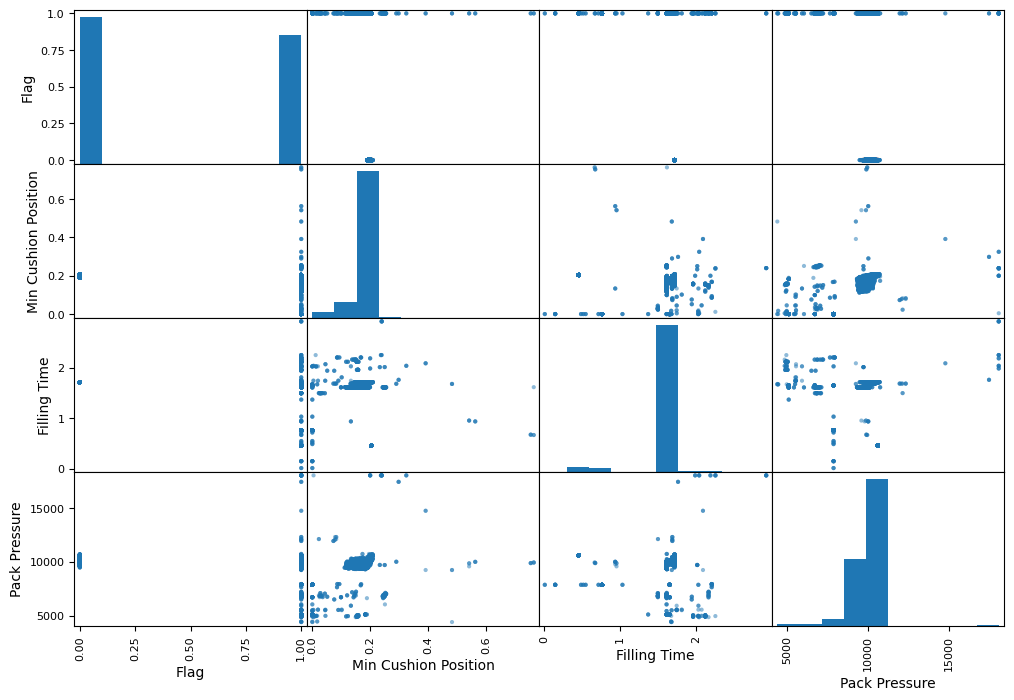

In [8]:
from pandas.plotting import scatter_matrix

attributes = ["Flag", "Min Cushion Position", "Filling Time", "Pack Pressure"]

scatter_matrix(df_combined[attributes], figsize = (12,8))

In [9]:
df_combined['Flag'].value_counts()

0    10547
1     9226
Name: Flag, dtype: int64

#### VIF Analysis

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

set1 = df_combined.drop(['Flag'], axis=1)

In [11]:
vif_data = pd.DataFrame()
vif_data["column"] = set1.columns
vif_data["VIF Value"] = [variance_inflation_factor(set1.values, i)
    for i in range(len(set1.columns))]
vif_data

,column,VIF Value
0,Barrel Temp Zone 1,28039.394766
1,Barrel Temp Zone 2,202978.275563
2,Barrel Temp Zone 3,554409.731665
3,Barrel Temp Zone 4,370606.499816
4,Barrel Temp Zone 5,3481.499159
5,Clamp Tonnage After Hold,386.516420
6,Cooling Time,383.314030
7,Cycle Time,1.046524
8,Dose Time,630.904390
9,Ejector Ejection Position,7735.130043


In [12]:
temperature_columns = df_combined.filter(['Barrel Temp Zone 1', 'Barrel Temp Zone 2', 'Barrel Temp Zone 3',
 'Barrel Temp Zone 4', 'Barrel Temp Zone 5'])
temperature_columns.corr()

CAPAB_NAME,Barrel Temp Zone 1,Barrel Temp Zone 2,Barrel Temp Zone 3,Barrel Temp Zone 4,Barrel Temp Zone 5
CAPAB_NAME,,,,,
Barrel Temp Zone 1,1.000000,0.966405,0.848297,0.746144,0.811655
Barrel Temp Zone 2,0.966405,1.000000,0.917343,0.823006,0.743999
Barrel Temp Zone 3,0.848297,0.917343,1.000000,0.978299,0.435851
Barrel Temp Zone 4,0.746144,0.823006,0.978299,1.000000,0.256436
Barrel Temp Zone 5,0.811655,0.743999,0.435851,0.256436,1.000000


High correlations everywhere except between zones 4 and 5. 4 has .08 correlation with the target, thus could drop?

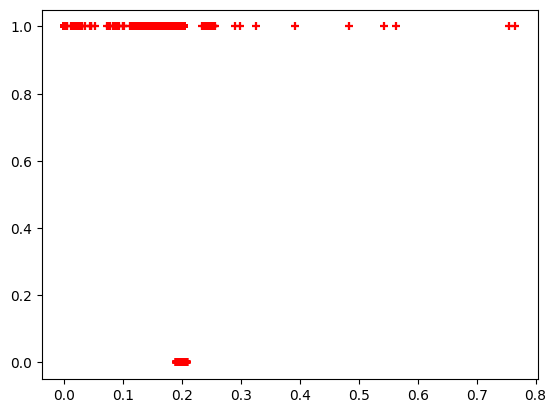

In [13]:
plt.scatter(df_combined['Min Cushion Position'], df_combined['Flag'], marker='+', color='red')

(array([6.430e+02, 6.000e+00, 9.000e+00, 1.100e+01, 9.000e+00, 9.000e+00,
        3.000e+00, 0.000e+00, 0.000e+00, 6.000e+00, 6.000e+00, 9.000e+00,
        9.000e+00, 3.000e+00, 3.000e+00, 1.370e+02, 2.530e+02, 8.120e+02,
        3.200e+02, 2.420e+02, 2.280e+02, 3.390e+02, 4.560e+02, 9.600e+02,
        3.136e+03, 8.281e+03, 3.733e+03, 5.900e+01, 0.000e+00, 0.000e+00,
        6.000e+00, 2.000e+01, 2.900e+01, 9.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 3.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00,
        0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

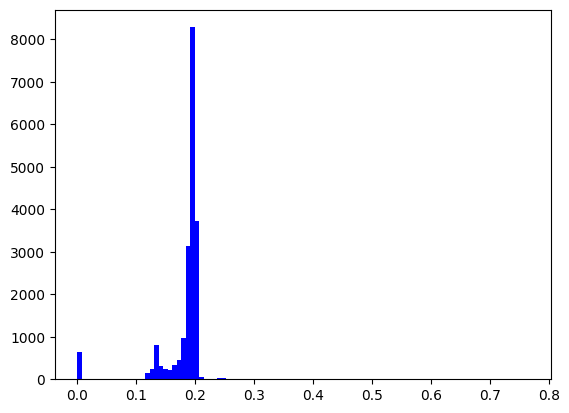

In [14]:
plt.hist(df_combined['Min Cushion Position'], color='blue', bins=100)

(array([3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 9.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        5.8600e+02, 3.0000e+00, 3.0000e+00, 3.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 5.0000e+00, 0.0000e+00, 3.0000e+00,
        5.0200e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 6.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00,
        3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.6000e+01, 0.0000e+00, 0.0000e+00, 2.7000e+01,
        5.5470e+03, 1.2800e+02, 1.5370e+03, 1.1223e+04, 1.1000e+01,
        3.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.4000e+01, 3.0000e+00, 6.0000e+00, 2.0000e+01,
        3.0000e+00, 3.0000e+00, 2.9000e+01, 1.80

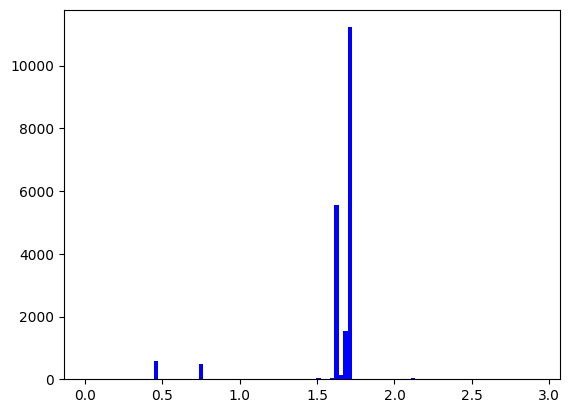

In [15]:
plt.hist(df_combined['Filling Time'], color='blue', bins=100)

### Split Training and Test Sets

In [16]:
Y_set = df_combined['Flag']
Y_set

TIME_STAMP
09-28-22 11:43:46    1
09-28-22 11:44:06    1
09-28-22 11:44:26    1
09-28-22 11:44:46    1
09-28-22 11:45:06    1
                    ..
10-07-22 9:58:29     0
10-07-22 9:58:49     0
10-07-22 9:59:09     0
10-07-22 9:59:29     0
10-07-22 9:59:49     0
Name: Flag, Length: 19773, dtype: int64

In [17]:
X_set = df_combined.drop(['Flag'], axis=1)
X_set

CAPAB_NAME,Barrel Temp Zone 1,Barrel Temp Zone 2,Barrel Temp Zone 3,Barrel Temp Zone 4,Barrel Temp Zone 5,Clamp Tonnage After Hold,Cooling Time,Cycle Time,Dose Time,Ejector Ejection Position,Ejector Ejection Speed,Filling Peak Pressure,Filling Time,Injection Speed,Min Cushion Position,Pack Pressure
TIME_STAMP,,,,,,,,,,,,,,,,
09-28-22 11:43:46,281.66,399.92,399.92,399.92,399.56,-0.088998,20.0,39.776,7.312,2.599996,15.0,1143.474392,0.761,1.2,0.000000,7863.406449
09-28-22 11:44:06,281.66,399.92,399.92,399.92,399.92,-0.088998,20.0,39.776,7.312,2.599996,15.0,1143.474392,0.761,1.2,0.000000,7863.406449
09-28-22 11:44:26,281.66,399.92,399.92,399.92,399.92,-0.088998,20.0,39.776,7.312,2.599996,15.0,1143.474392,0.761,1.2,0.000000,7863.406449
09-28-22 11:44:46,281.66,399.92,399.92,399.92,399.92,-0.088998,20.0,39.776,7.312,2.599996,15.0,1143.474392,0.761,1.2,0.000000,7863.406449
09-28-22 11:45:06,281.84,399.92,399.92,399.92,399.74,-0.088998,20.0,39.776,7.312,2.599996,15.0,1143.474392,0.761,1.2,0.000000,7863.406449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10-07-22 9:58:29,499.46,499.82,509.72,519.98,509.72,76.522035,6.5,22.968,5.464,1.900000,25.0,9817.246837,1.715,1.5,0.193772,9820.351187
10-07-22 9:58:49,500.18,499.82,509.72,519.98,509.72,76.433038,6.5,22.968,5.464,1.900000,25.0,9823.455537,1.714,1.5,0.194157,9823.455537
10-07-22 9:59:09,500.18,499.82,509.90,519.98,510.08,76.433038,6.5,22.968,5.464,1.900000,25.0,9823.455537,1.714,1.5,0.194157,9823.455537


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_set,Y_set, test_size=0.2, stratify=Y_set,random_state=42)

#### Check Stratified Proportions

In [19]:
real_proportion = df_combined['Flag'].value_counts() / df_combined['Flag'].size
real_proportion

0    0.533404
1    0.466596
Name: Flag, dtype: float64

In [20]:
train_proportion = y_train.value_counts() / y_train.size
train_proportion

0    0.53338
1    0.46662
Name: Flag, dtype: float64

In [21]:
test_proportion = y_test.value_counts() / y_test.size
test_proportion

0    0.533502
1    0.466498
Name: Flag, dtype: float64

### Classification Models

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

In [23]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [24]:
y_predicted = model.predict(X_test)

In [25]:
model.score(X_test, y_test)

0.870290771175727

#### Confusion Matrix

In [26]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predicted)

array([[1952,  158],
       [ 355, 1490]])

In [27]:
import numpy


total = (1952 + 158 + 355 + 1490)
T_Neg = 1952 / total
T_Pos = 1490 / total
F_Neg = 355 / total
F_Pos = 158 / total

A = numpy.array([T_Neg, T_Pos, F_Neg, F_Pos])
A

array([0.49355247, 0.37673831, 0.0897598 , 0.03994943])

#### Precision and Recall

In [28]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, y_predicted)

0.904126213592233

In [29]:
recall_score(y_test, y_predicted)

0.8075880758807588

##### Predict probability (prob_a) of an instance belonging to a certain class

In [30]:
model.predict_proba(X_test)

array([[0.75881215, 0.24118785],
       [0.72152083, 0.27847917],
       [0.04699415, 0.95300585],
       ...,
       [0.73965549, 0.26034451],
       [0.        , 1.        ],
       [0.        , 1.        ]])

* Will need to perform cross validation to find best algorithm on all possible training/test splits
* Other possible algorithms:
    * SVM
    * Decision Tree
    * SGD Classifier
    * Ridge/Regularized regression of some sort